# K均值算法介绍

## K均值算法特点
- K均值算法全称为 K均值聚类算法。 该算法有两个特点：
    - 样本数据不需要带分类标签或期望输出（无监督学习）
    - 聚类
    - 
    

## 机器学习种类

- 最早机器学习算法大致分成监督学习与非监督学习；随着新的算法的出现，目前机器学习的算法大致可以分成4类。
    - 监督学习
    - 无监督学习
    - 半监督学习
    - 强化学习
    
- 上述机器学习的分类主要从训练的数据特点来说的，当然不同的训练数据特点产生不同的算法。

1. 监督学习
    - 监督学习的训练数据特点是：
        - 训练的样本都带分类标签或者期望输出。
    - 监督学习主要用于分类与预测（回归）

    - 常见监督学习算法：
        - k邻近算法（k-Nearest Neighbors）
        - 线性回归（Linear Regression）
        - 逻辑回归（Logistic Regression）
        - 支持向量积（Support Vector Machines (SVMs)）
        - 决策树（Decision Trees and Random Forests）
        - 神经网络（Neural networks）

2. 无监督学习
    - 无监督学习是相对监督学习而言，其训练数据特点是：
        - 训练样本没有期望输出与分类标签。
    - 无监督学习主要用于降维与异常检测
    
    - 主要的无监督学习算法有：
        - 聚类算法
            - **K-均值算法（K-Means）**
            - 层次聚类分析（Hierarchical Cluster Analysis (HCA)）
            - 期望最大化（Expectation Maximization）
        - 降维算法
            - **主成分分析（Principal Component Analysis (PCA)）**
            - 核主成分分析（Kernel PCA）
            - 局部线性嵌入（Locally-Linear Embedding (LLE)）
            - t-分布随机邻近嵌入（t-distributed Stochastic Neighbor Embedding (t-SNE)）
        - 关联规则算法
            - **Apriori**
            - Eclat

3. 半监督学习
    - 半监督学习的训练数据特点是：
        - 训练样本少量有分类标签与期望输出，大部分数据没有分类标签与期望输出。
        
    - 在实际应用场景中，训练样本少量有分类标签与期望输出，大部分数据没有分类标签与期望输出的情况比较普遍。

4. 强化学习
    - 根据结果自动决策的学习过程。类似人的行为，行为没有好坏，一单某个行为产生后，人会收到鼓励与惩罚，从而导致对鼓励的行为进行累积学习。

# K均值算法

1. K均值算法是一种分类算法。
2. K均值算法的分类思想比较直观与朴素；根据样本到均值点的远近分类。初始的均值点随机从样本点中选择。K均值的算法步骤为：
    1. 确定需要分类的类别数，假设分类类别数是n，假设n个分类集合是$(s_1,s_2,\dots,s_n)$。
    2. 随机从已知样本集中，选择n个样本点作为均值点，假设均值点是$(c_1, c_2, \dots, c_n)$。
    3. 遍历样本集中每个样本点$x$，分别计算样本点$x$到n个均值点的欧氏距离：$d(x,ci), i \in (1,2,\dots,n)$。
    4. 比较样本点$x$到均值点的距离大小，$x$就归属距离均值点最近的均值点（$c_i$）所在的类别(属于第$i$类)。
    5. 对所有样本集中的样本点分类完毕，然后对$n$类集合重新计算均值点$(c_1, c_2, \dots, c_n)$，清空分类集合$(s_1,s_2,\dots, s_n)$。继续从第三步开始重新分类，直到所有样本点的分类不改变（就是均值点稳定、不改变）。
    
    
- 注意：
    - 实际为了提早结束训练，算法也可以指定迭代次数；
    - 对分类稳定的判定，也可以采用在一定误差范围内判定为稳定；要做到分类完全不改变，在某些情况下，可能算法不会结束。

# K均值算法实现与应用

## sklearn应用

1. 在sklearn中，K均值算法属于聚类（Clustering）。

2. Means类定义说明：

```python

    class sklearn.cluster.KMeans(
        n_clusters=8,          # 分类中心
        init=’k-means++’,    # 选择初始均值点的方式
        n_init=10,                # k-均值算法在不同的均值中心运行的次数，这样可以保障更好的结果。
        max_iter=300,         # 最大迭代次数
        tol=0.0001,              # 控制收敛的误差
        precompute_distances=’auto’, 
        verbose=0, 
        random_state=None, 
        copy_x=True, 
        n_jobs=None,            # 任务数
        algorithm=’auto’)

```

3. 使用k均值算法
    - 下面算法采用鸢尾花数据。

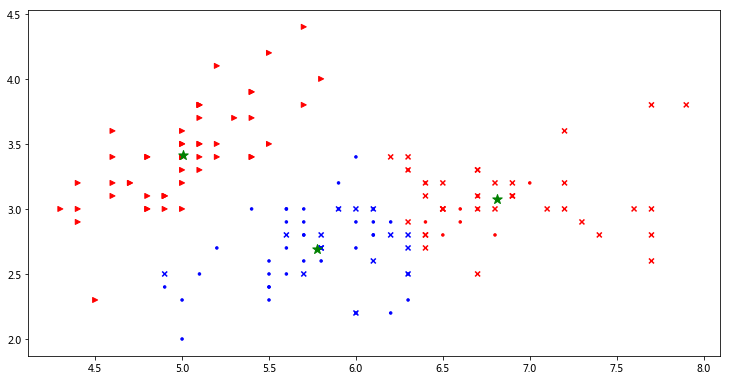

array([[5.006     , 3.418     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])

In [119]:
% matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn.datasets as ds
from sklearn.cluster import KMeans


# 加载数据
data, target= ds.load_iris(return_X_y=True)

X = data[:, :2:]

#  K-均值算法实现
cluster = KMeans(n_clusters=3)
# 训练
cluster.fit(X)
# 分类
pre = cluster.predict(X)

# 可视化
# 数据可视化
fig = plt.figure('K均值算法', figsize=(12, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# 使用颜色与点的形状来区分聚类与类别
colors = ListedColormap([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
ax.scatter(data[0:50, 0], data[0:50:, 1], s=25, c=pre[:50], marker='>' , cmap=colors)
ax.scatter(data[50:100, 0], data[50:100:, 1], s=25, c=pre[50:100], marker='.', cmap=colors)
ax.scatter(data[100:150, 0], data[100:150:, 1], s=25, c=pre[100:150], marker='x', cmap=colors)

# 绘制均值点（质心点）
ax.scatter(cluster.cluster_centers_[:,0],  cluster.cluster_centers_[:, 1], c='g', s=100 ,marker='*')
plt.show()
cluster.cluster_centers_

## numpy实现

1. 实现基础 - 根据均值中心聚类的能力
    - 能初始化均值中心。
    - 能计算欧氏距离，并得到最小距离。
    - 能管理聚类的样本点。
    - 能更新新的均值中心。
    
2. 循环聚类的结束条件：
    - 根据新旧均值中，计算对应的距离，如果所有距离小于给定的值，循环结束

In [76]:
% matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn.datasets as ds
import numpy as np


# 加载数据
data, target =ds.load_iris(return_X_y=True) 

# 定义一个均值变动误差，用来判定是否该结束。
tol = 0.0001

# 聚类的类别数
cluster_num = 3
# 聚类的样本集合
clusters = []  
# 聚类的均值点（也称质心点）:初始取随机值
idx = np.random.choice(range(0,len(data)),  cluster_num)   
# 上面代码有可能取到相同的。（可以考虑使用一个判定，直到取值不同）
cls_clusters ={}   # 存放分类列表，只存放下标
# 初始化聚类点。
for i in idx:
    clusters.append(data[i])

# 初始化聚类的样本下标
for i in range(len(clusters)):
    cls_clusters[i] = []    # 值存放下标
    

# 循环计算样本到均值点的距离
for sample_idx in range(len(data)):
    # 循环均值点计算距离
    distances = []  # 用来存放样本到三个均值点的距离
    for cluster in clusters:
        # 计算欧氏距离
        diff = (cluster - data[sample_idx])**2
        distance = np.sqrt(diff.sum())
        distances.append(distance)
    # 取最小的距离
    min_idx = np.argmin(distances)
    cls_clusters[min_idx].append(sample_idx)

#  使用聚类的样本点，更新均值中心，为下次聚类做准备
new_clusters = []  # 
for cls in cls_clusters:
    cls_idx = cls_clusters[cls]
    # 根据下标得到数据集
    cls_data = data.take(cls_idx, axis=0)
    # 计算均值
    cls_mean = cls_data.mean(axis=0)
    # 更新对应的均值中心
    new_clusters.append(cls_mean)

# 判定新旧均值中心的值是否变化。
is_continue = False
for i in range(len(clusters)):
    delta = np.sqrt(((clusters[i] - new_clusters[i])**2).sum())
    print(delta)
    if delta > tol:
        is_continue = True
        break
if is_continue:
    print('需要继续聚类')

0.7729956159139736
需要继续聚类


3. 实现函数封装

In [80]:
% matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn.datasets as ds
import numpy as np


def cluster_one(data_, clusters_, tol_):
    cls_clusters ={}   # 存放分类列表，只存放下标
    # 初始化聚类点。    # 初始化聚类的样本下标
    for i in range(len(clusters_)):
        cls_clusters[i] = []    # 值存放下标


    # 循环计算样本到均值点的距离
    for sample_idx in range(len(data_)):
        # 循环均值点计算距离
        distances = []  # 用来存放样本到三个均值点的距离
        for cluster in clusters_:
            # 计算欧氏距离
            diff = (cluster - data[sample_idx])**2
            distance = np.sqrt(diff.sum())
            distances.append(distance)
        # 取最小的距离
        min_idx = np.argmin(distances)
        cls_clusters[min_idx].append(sample_idx)

    #  使用聚类的样本点，更新均值中心，为下次聚类做准备
    new_clusters = []  # 
    for cls in cls_clusters:
        cls_idx = cls_clusters[cls]
        # 根据下标得到数据集
        cls_data = data.take(cls_idx, axis=0)
        # 计算均值
        cls_mean = cls_data.mean(axis=0)
        # 更新对应的均值中心
        new_clusters.append(cls_mean)

    # 判定新旧均值中心的值是否变化。
    is_continue = False
    for i in range(len(clusters_)):
        delta = np.sqrt(((clusters_[i] - new_clusters[i])**2).sum())
        if delta > tol_:
            is_continue = True
            break
    return is_continue, new_clusters, cls_clusters   # 分别返回是否需要聚类，新的均值中心，与聚类样本的下标

# ------------------
# 加载数据
data, target =ds.load_iris(return_X_y=True) 

# 定义一个均值变动误差，用来判定是否该结束。
tol = 0.0001

# 聚类的类别数
cluster_num = 3
# 聚类的样本集合
clusters = []  
# 聚类的均值点（也称质心点）:初始取随机值
idx = np.random.choice(range(0,len(data)),  cluster_num)   
# 上面代码有可能取到相同的。（可以考虑使用一个判定，直到取值不同）

for i in idx:
    clusters.append(data[i])
    
b, c, r=cluster_one(data, clusters, tol)

0.7528288663988206


4. 完整的实现
    - 反复迭代

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]


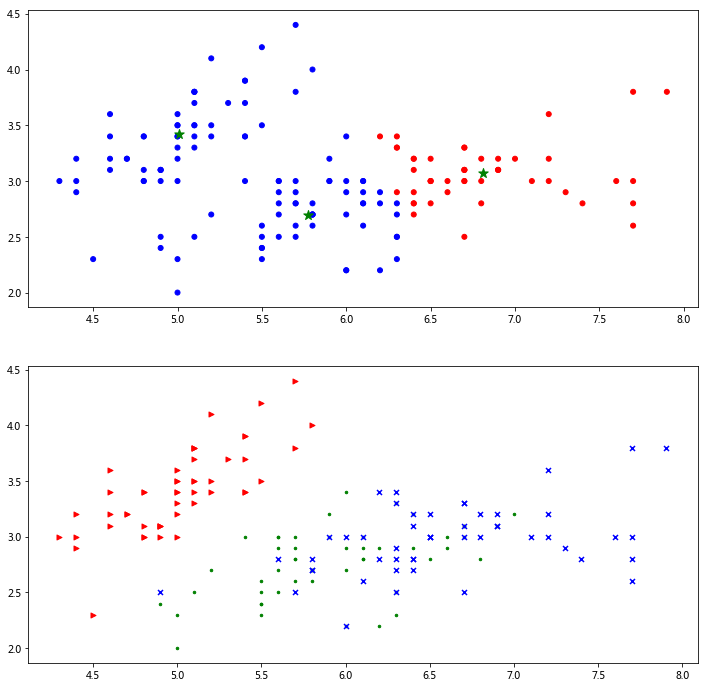

In [134]:
% matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn.datasets as ds
import numpy as np


def cluster_one(data_, clusters_, tol_):
    cls_clusters ={}   # 存放分类列表，只存放下标
    # 初始化聚类点。    # 初始化聚类的样本下标
    for i in range(len(clusters_)):
        cls_clusters[i] = []    # 值存放下标


    # 循环计算样本到均值点的距离
    for sample_idx in range(len(data_)):
        # 循环均值点计算距离
        distances = []  # 用来存放样本到三个均值点的距离
        for cluster in clusters_:
            # 计算欧氏距离
            diff = (cluster - data[sample_idx])**2
            distance = np.sqrt(diff.sum())
            distances.append(distance)
        # 取最小的距离
        min_idx = np.argmin(distances)
        cls_clusters[min_idx].append(sample_idx)

    #  使用聚类的样本点，更新均值中心，为下次聚类做准备
    new_clusters = []  # 
    for cls in cls_clusters:
        cls_idx = cls_clusters[cls]
        # 根据下标得到数据集
        cls_data = data.take(cls_idx, axis=0)
        # 计算均值
        cls_mean = cls_data.mean(axis=0)
        # 更新对应的均值中心
        new_clusters.append(cls_mean)

    # 判定新旧均值中心的值是否变化。
    is_continue = False
    for i in range(len(clusters_)):
        delta = np.sqrt(((clusters_[i] - new_clusters[i])**2).sum())
        if delta > tol_:
            is_continue = True
            break
    return is_continue, new_clusters, cls_clusters   # 分别返回是否需要聚类，新的均值中心，与聚类样本的下标

# ------------------
# 加载数据
data, target =ds.load_iris(return_X_y=True) 

data = data[:, :2:]
# 定义一个均值变动误差，用来判定是否该结束。
tol = 0.0001

# 聚类的类别数
cluster_num = 3
# 聚类的样本集合
clusters = []  
# 聚类的均值点（也称质心点）:初始取随机值
idx = np.random.choice(range(0,len(data)),  cluster_num)   
# 上面代码有可能取到相同的。（可以考虑使用一个判定，直到取值不同）

for i in idx:
    clusters.append(data[i])

b = True
while b:
    b, c, r=cluster_one(data, clusters, tol)
    clusters = c

# print('聚类结束')
# print('聚类结果：', r)

# 把data数据的聚类结果转化为0，1，2
categories = []
for i in range(len(data)):
    # 判定数据下标在那个分类中
    for category in r:
        if i in r[category]:
            categories.append(category)
            break

print(categories)
# 可视化聚类结果
fig = plt.figure('K均值算法', figsize=(12, 12))

ax1, ax2 = fig.subplots(2,1)

# 使用颜色与点的形状来区分聚类与类别
colors = ListedColormap([(1, 0, 0, 1),(0, 0, 1, 1)])
ax1.scatter(data[:, 0], data[:, 1], s=25, c=categories, marker='o' ,cmap=colors)

# 绘制均值点（质心点）
for cc in c:
    ax1.scatter(cc[0],  cc[1], c='g', s=100 ,marker='*')
    
    
ax2.scatter(data[0:50, 0], data[0:50:, 1], s=25, c='r', marker='>' )
ax2.scatter(data[50:100, 0], data[50:100:, 1], s=25, c='g', marker='.' )
ax2.scatter(data[100:150, 0], data[100:150:, 1], s=25, c='b', marker='x')

plt.show()
